In [ ]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
 
from sklearn.neighbors import KNeighborsClassifier
 
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_excel("/content/New Credit card data.xlsx")
data.head()
 
x = data.drop(columns ='default payment next month')
y = data['default payment next month']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)
data_train, data_test = train_test_split(data,test_size=0.2, random_state=1)

In [ ]:

features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# Separating out the features

x_train_std = data_train.loc[:, features].values
# Separating out the target
y_train_std = data_train.loc[:,['default payment next month']].values

# Standardizing the features
x_train_std = StandardScaler().fit_transform(x_train_std)


# Separating out the features

x_test_std = data_test.loc[:, features].values
# Separating out the target
y_test_std = data_test.loc[:,['default payment next month']].values

# Standardizing the features
x_test_std = StandardScaler().fit_transform(x_test_std)





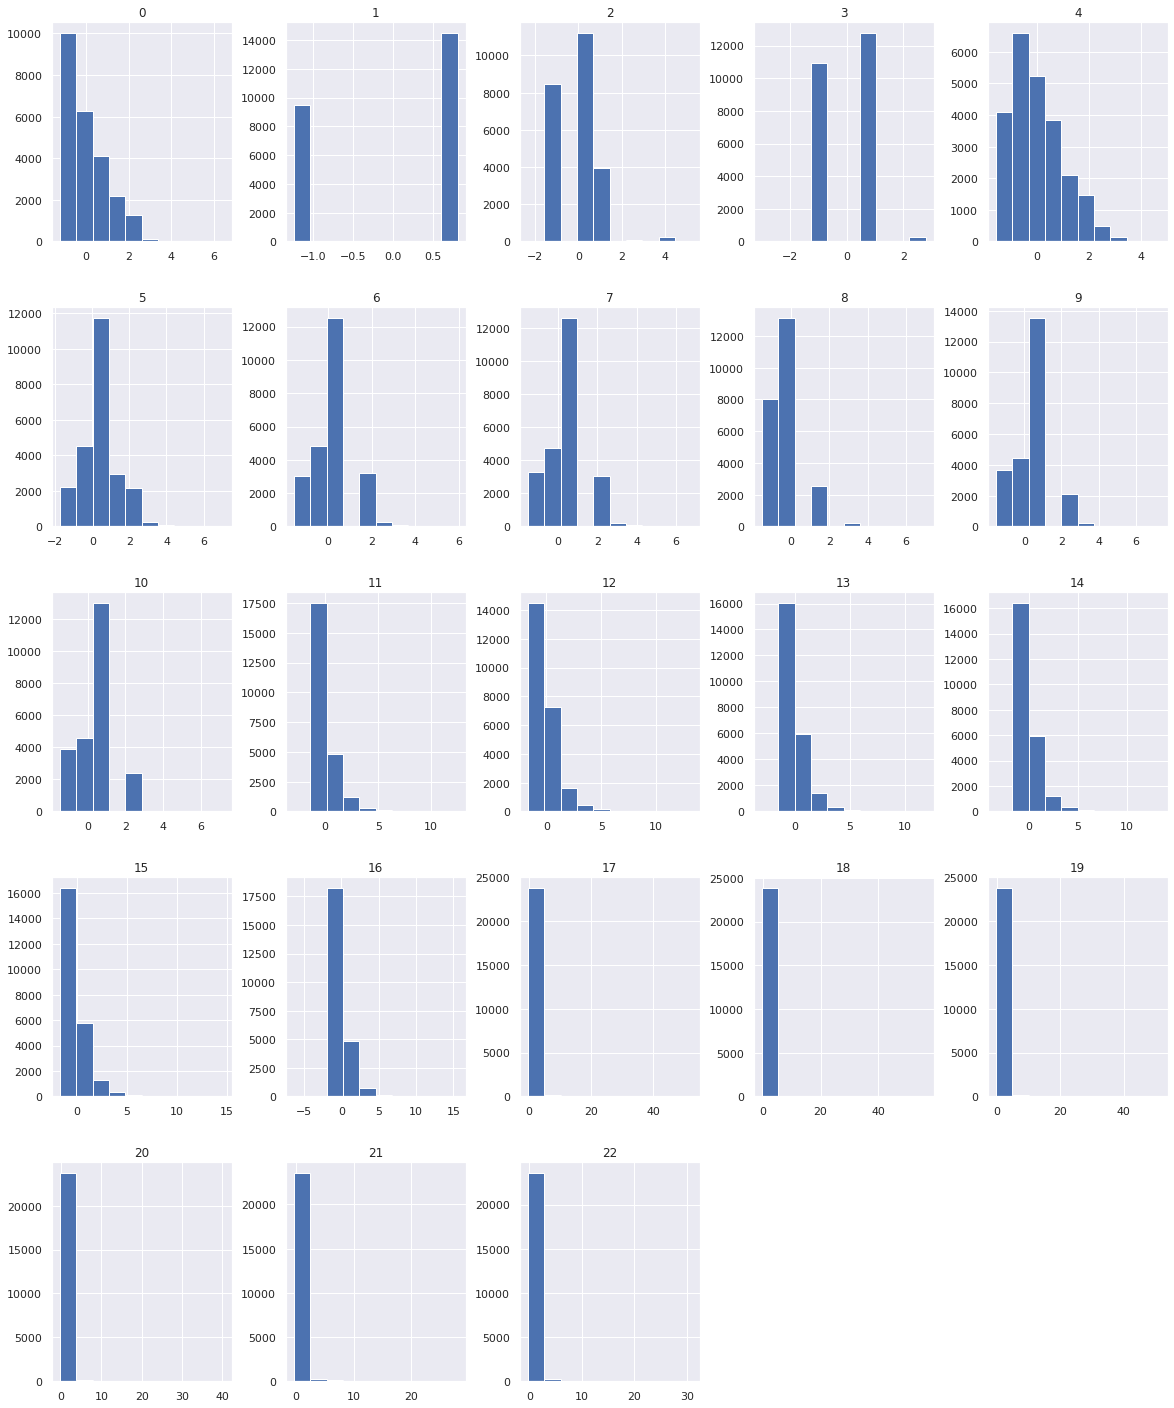

In [ ]:
fig=plt.figure(figsize=(20,25))
ax=fig.gca()
x_traindata_preoutliers =  pd.DataFrame(data = x_train_std)
x_traindata_preoutliers.hist(ax=ax)
plt.show()

In [ ]:
x_traindata_preoutliers =  pd.DataFrame(data = x_train_std)
y_traindata_preoutliers =  pd.DataFrame(data = y_train_std)
# print(x_traindata.describe())
# print(y_traindata.describe())

x_testdata_preoutliers =  pd.DataFrame(data = x_test_std)
y_testdata_preoutliers =  pd.DataFrame(data = y_test_std)
# print(x_testdata.describe())
# print(y_testdata.describe())

traindata_preoutliers = x_traindata_preoutliers
traindata_preoutliers['y'] = y_traindata_preoutliers

testdata_preoutliers = x_testdata_preoutliers
testdata_preoutliers['y'] = y_testdata_preoutliers
data_preoutliers = traindata_preoutliers.append(testdata_preoutliers)

# print(x_traindata)
# to_model_columns=x_smote_pca.columns

In [ ]:
# Isolation forest

ifc = IsolationForest(random_state = 1)
ifc.fit(traindata_preoutliers)
ifc_pred = ifc.predict(traindata_preoutliers)

ifc_pred[ifc_pred == 1] = 0
ifc_pred[ifc_pred == -1] = 1


# Remove outliers
traindata_no_outliers = traindata_preoutliers.copy()
traindata_no_outliers['ifc'] = ifc_pred
print("Before outliers",traindata_no_outliers.shape)

traindata_no_outliers = traindata_no_outliers[traindata_no_outliers['ifc'] == 0]
traindata_no_outliers.drop(['ifc'], axis = 1, inplace = True)
print('After Outliers',traindata_no_outliers.shape)


Before outliers (24000, 25)
After Outliers (21993, 24)


In [ ]:
x_train_std = traindata_no_outliers.drop(columns ='y')
y_train_std = traindata_no_outliers['y']
train_data_std = traindata_no_outliers

x_test_std =  testdata_preoutliers.drop(columns='y')
y_test_std =  testdata_preoutliers['y']
test_data_std = testdata_preoutliers

data_std =  train_data_std.append(test_data_std)


In [ ]:
Fraud = data_std[data_std['y'] == 1]
Valid = data_std[data_std['y'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print('Data Precentage:',outlier_fraction)
print('Data Fraud Cases: {}'.format(len(data_std[data_std['y'] == 1])))
print('Data Valid Transactions: {}'.format(len(data_std[data_std['y'] == 0])))


Fraud = train_data_std[train_data_std['y'] == 1]
Valid = train_data_std[train_data_std['y'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print('Train Data Precentage:',outlier_fraction)
print('Train Data Fraud Cases: {}'.format(len(train_data_std[train_data_std['y'] == 1])))
print('Train Data Transactions: {}'.format(len(train_data_std[train_data_std['y'] == 0])))

Fraud = test_data_std[test_data_std['y'] == 1]
Valid = test_data_std[test_data_std['y'] == 0]
outlier_fraction = len(Fraud)/float(len(Valid))
print('Test Data Precentage:',outlier_fraction)
print('Test Data Fraud Cases: {}'.format(len(test_data_std[test_data_std['y'] == 1])))
print('Test Data Valid Transactions: {}'.format(len(test_data_std[test_data_std['y'] == 0])))



Data Precentage: 0.2649344780840488
Data Fraud Cases: 5863
Data Valid Transactions: 22130
Train Data Precentage: 0.259117192419992
Train Data Fraud Cases: 4526
Train Data Transactions: 17467
Test Data Precentage: 0.28672528415183357
Test Data Fraud Cases: 1337
Test Data Valid Transactions: 4663


**PCA**

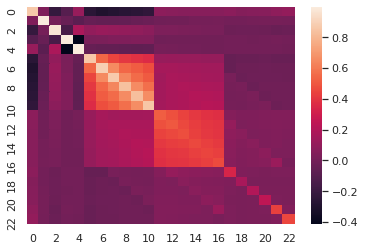

In [ ]:
Cov_train =  np.cov(x_train_std.T)

Cov_train_df =  pd.DataFrame(data = Cov_train)
# print(Cov_train_df)
# print(Cov_train_df)
ax = sns.heatmap(Cov_train_df, xticklabels=2, yticklabels=2)
# cov = df.T.cov()

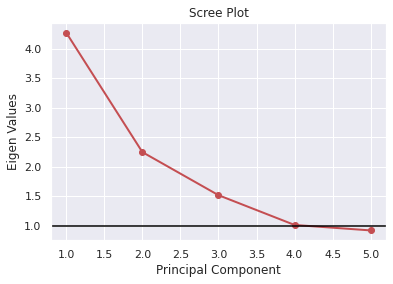

total variance explained - 0.6769086564510614
variance explained - [0.29023826 0.15263018 0.10299429 0.06866679 0.06237914]
Eigen Values- [4.26873729 2.24483892 1.51480922 1.0099305  0.91745368]


In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x_train_std)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

principalDf = pd.DataFrame(data = principalComponents)

# print(principalDf)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_, 'ro-', linewidth=2)
plt.axhline(y=1, color='black', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigen Values')
plt.show()

print("total variance explained -" , sum(pca.explained_variance_ratio_))
print("variance explained -" , pca.explained_variance_ratio_)
print("Eigen Values-" , pca.explained_variance_)


In [ ]:
x_train_std_pca = pca.transform(x_train_std)
x_test_std_pca = pca.transform(x_test_std)